In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('segmentation data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
data.shape

(2000, 8)

In [4]:
data.info()# We notice that data is clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


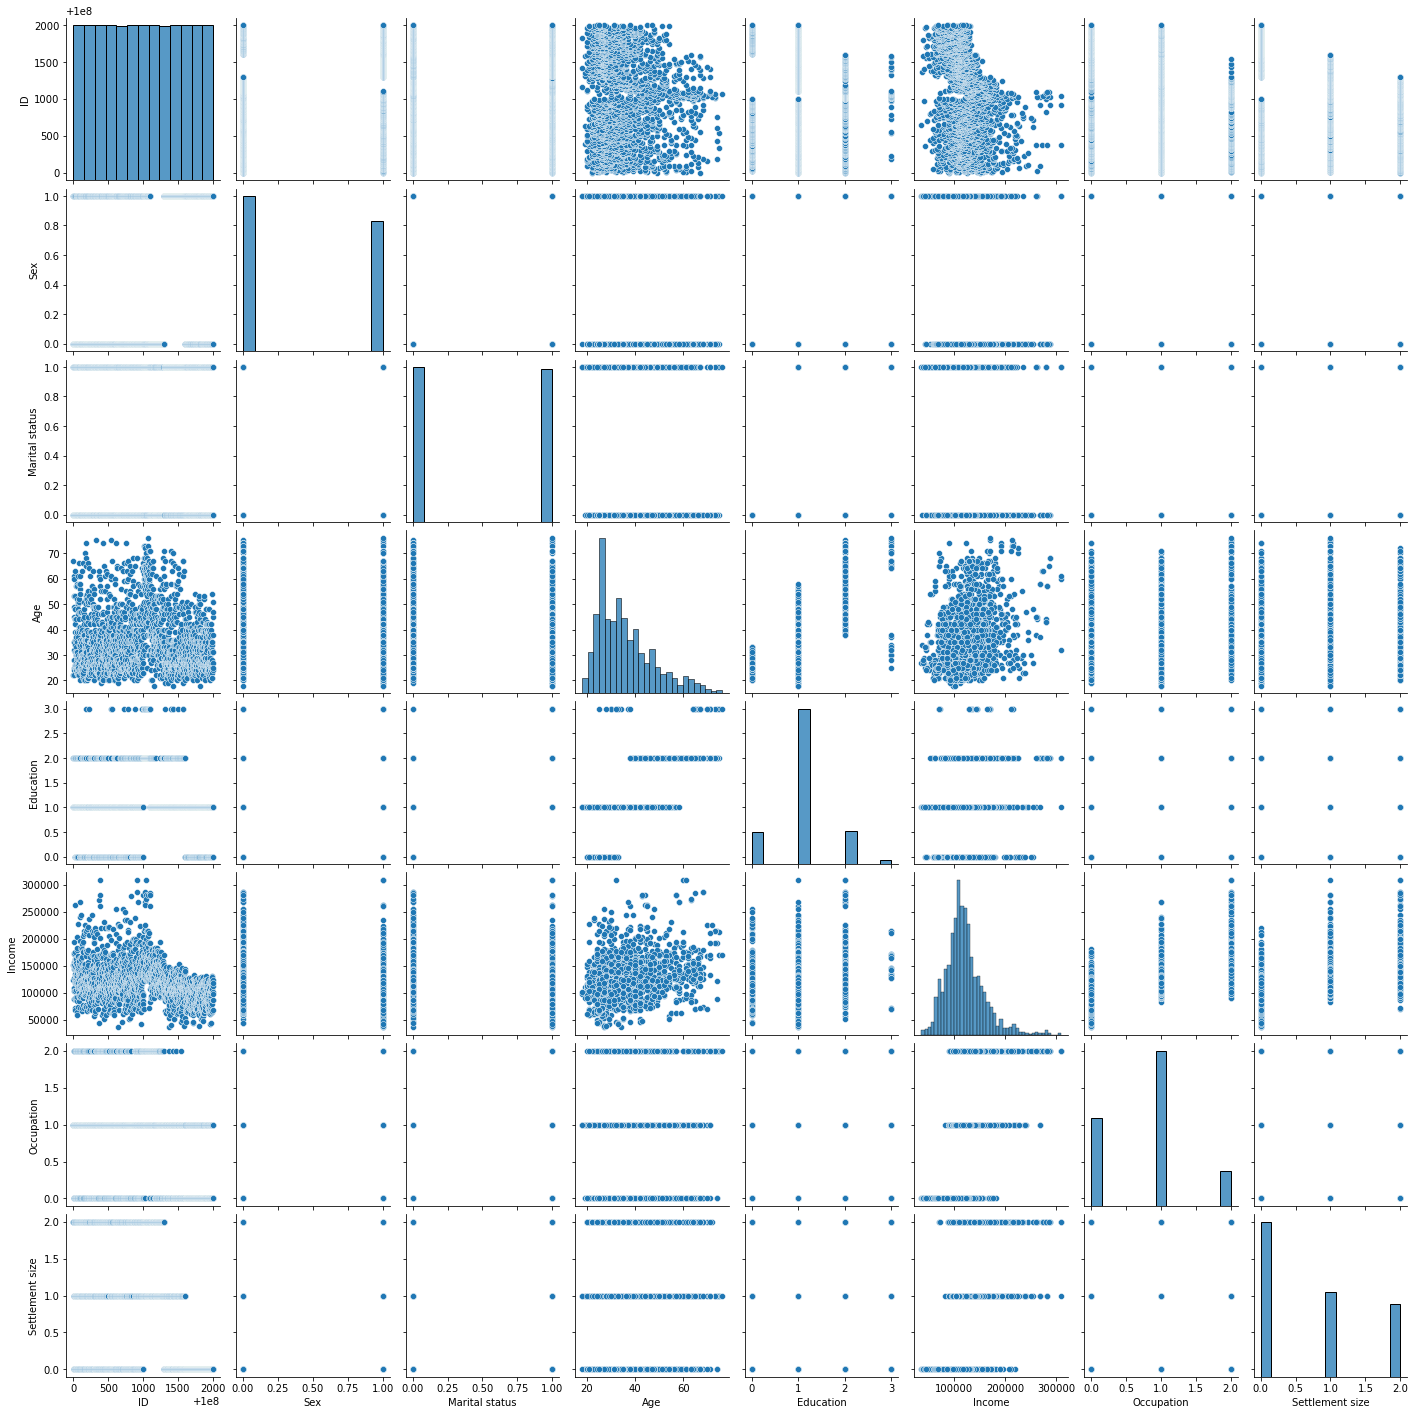

In [5]:
sns.pairplot(data)

In [6]:
#correlation
data.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


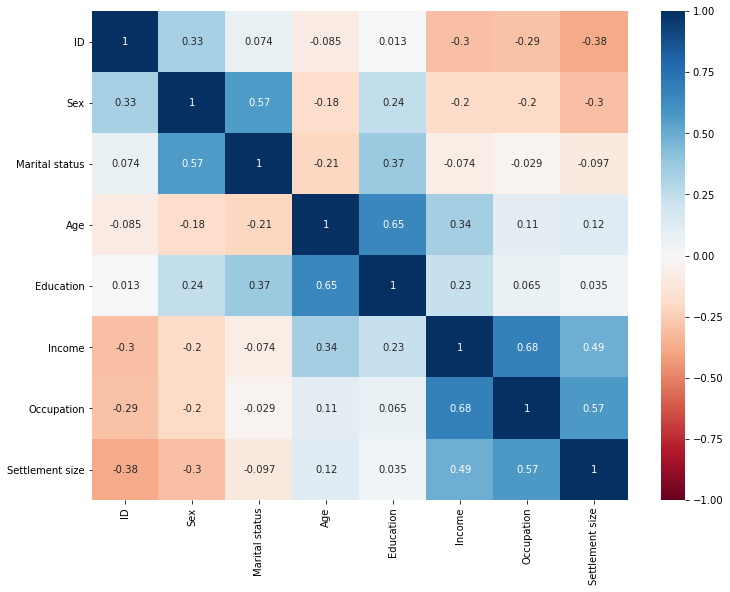

In [7]:
plt.figure(figsize=(12,9))
s=sns.heatmap(data.corr(),
              annot=True,
              cmap='RdBu',
              vmin=-1,
              vmax=1             
             )

### DATA STANDARDIZATION

In [8]:
scaler=StandardScaler()
scaler.fit(data)
segmentation_std=scaler.transform(data)

### HIERARCHICAL CLUSTERING

In [9]:
hierarch_clust=linkage(segmentation_std,method='ward')

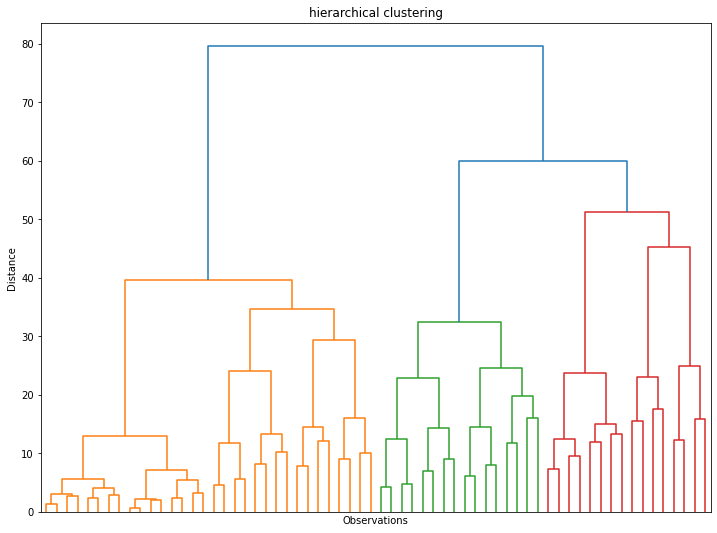

In [10]:
plt.figure(figsize=(12,9))
plt.title('hierarchical clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hierarch_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=5)
plt.show()

As Rule: the cut will be at the longest vertical line (distance) which is not inercepted by any horizontal line. With bigger number of observations this type of clustering might take too much time.

### K-MEANS 

In [11]:
wcss=[]
for i in range(1,11):
    clf=KMeans(i)
    clf.fit(segmentation_std)
    wcss.append(clf.inertia_)
    

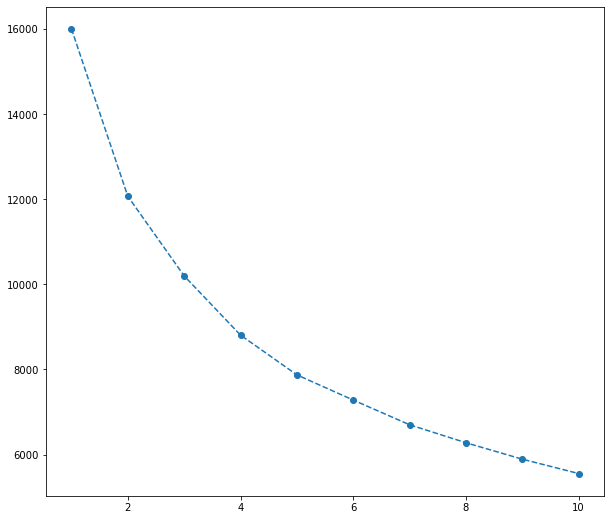

In [12]:
k=range(1,11)
plt.figure(figsize=(10,9))
plt.plot(k,wcss,marker='o',linestyle='--')
plt.show()

In [13]:
#Let check result for nr of cluster=4
clf=KMeans(4)
clf.fit(segmentation_std)
clusters=clf.predict(segmentation_std)
wcss=clf.inertia_
wcss

8805.254481669748

In [14]:
clusters

array([2, 1, 3, ..., 3, 1, 3])

In [15]:
clf.labels_

array([2, 1, 3, ..., 3, 1, 3])

In [16]:
df_segm_kmean= data.copy()
df_segm_kmean['clusters']=clusters

In [17]:
df_segm_kmean.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0


## Finding Segments by grouping by clusters

In [18]:
df_segm_kmean.groupby('clusters').mean()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusters,,,,,,,,
0,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658
1,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262
2,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481
3,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666


Let describe the above results.WE have found four segments. In the first one we there are the ones with average age of 35, high amount of income,high metric of occupation,3% are female(means of 1) and almost are single,low education,live in big cities so we identify them as "normal opportunities"


Second segment seem to be all in relationships with average age of 29,stable education,medium salary living in small cities.W identify them as "standard"

Third group almost equally distributed between men and women,in relationships with average age of 55, high amount of salary and occupation living in big cities, so we identify them as 'well-off'

In last group 60% of them are male ,single,with average age of 34, low income,living in small areas, we identify this group as 'career-focused'

In [19]:
grouped_data=df_segm_kmean.groupby('clusters').mean()

In [21]:
grouped_data['Nr_Obs']=df_segm_kmean[['clusters','Sex']].groupby('clusters').count()

In [27]:
grouped_data['Proportions']=grouped_data['Nr_Obs']/grouped_data['Nr_Obs'].sum()

In [28]:
grouped_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Nr_Obs,Proportions
clusters,,,,,,,,,,
0,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632,0.3160
1,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679,0.3395
2,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270,0.1350
3,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419,0.2095


In [30]:
grouped_data.rename({0:'normal_opportunities',1:'standard',2:'well_off',3:'career_focused'})


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Nr_Obs,Proportions
clusters,,,,,,,,,,
normal_opportunities,1.000007e+08,0.030063,0.178797,35.632911,0.737342,139944.602848,1.250000,1.387658,632,0.3160
standard,1.000011e+08,0.876289,0.998527,29.002946,1.067747,105597.536082,0.630339,0.418262,679,0.3395
well_off,1.000009e+08,0.485185,0.681481,55.814815,2.125926,156320.200000,1.096296,1.081481,270,0.1350
career_focused,1.000014e+08,0.403341,0.042959,34.689737,0.742243,94407.322196,0.255370,0.059666,419,0.2095


In [31]:
df_segm_kmean.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0


In [37]:
#In the column of clusters we are going to put the segments we have identified earlier
df_segm_kmean['clusters']=df_segm_kmean['clusters'].map({0:'normal_opportunities',1:'standard',2:'well_off',3:'career_focused'})

In [38]:
df_segm_kmean.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,100000001,0,0,67,2,124670,1,2,well_off
1,100000002,1,1,22,1,150773,1,2,standard
2,100000003,0,0,49,1,89210,0,0,career_focused
3,100000004,0,0,45,1,171565,1,1,normal_opportunities
4,100000005,0,0,53,1,149031,1,1,normal_opportunities


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


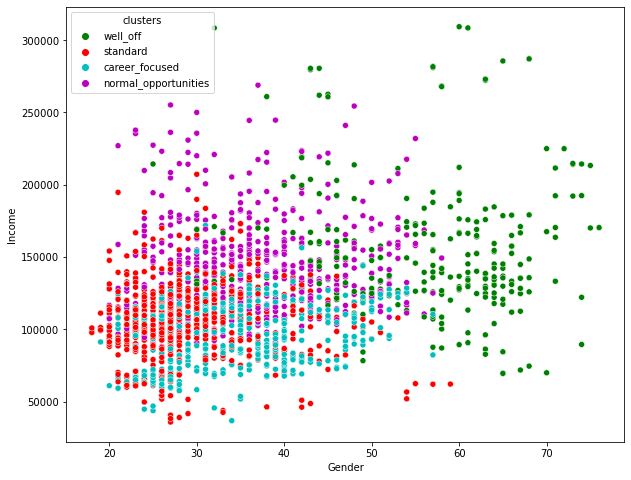

In [43]:
#Let plot the data
plt.figure(figsize=(10,8))
sns.scatterplot(df_segm_kmean['Age'],df_segm_kmean['Income'],hue=df_segm_kmean['clusters'],palette=['g','r','c','m'])
plt.xlabel('Gender')
plt.ylabel("Income")
plt.show()

### PCA

In [55]:
# PCA nr of components= PCA nr of features
pca=PCA()
pca.fit(segmentation_std)


PCA()

In [56]:
pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

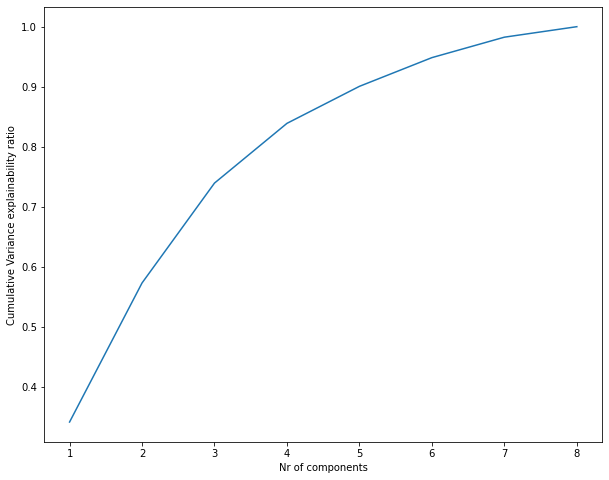

In [57]:
# Let visu\lize the results
plt.figure(figsize=(10,8))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Nr of components')
plt.ylabel('Cumulative Variance explainability ratio')
plt.show()

Rule of thumb: Keep around 80% of variance explainability!!

In [70]:
pca=PCA(3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [71]:
pca.components_ #loadings: correlation between an original variable and a component

array([[-0.34541048, -0.32858553, -0.18726934,  0.27028302,  0.10451468,
         0.48384405,  0.46168136,  0.45433728],
       [ 0.10723681,  0.4213196 ,  0.47208337,  0.35525956,  0.65278586,
         0.17628427,  0.06136181, -0.0307768 ],
       [ 0.14352194, -0.31795888, -0.4854334 ,  0.61344196,  0.25225754,
        -0.12360121, -0.34456626, -0.26212582]])

In [73]:
#Let put it in a dataframe
pca_data=pd.DataFrame(data=pca.components_,columns=data.columns.values,index=['component1','component2','component3'])
pca_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component1,-0.345410,-0.328586,-0.187269,0.270283,0.104515,0.483844,0.461681,0.454337
component2,0.107237,0.421320,0.472083,0.355260,0.652786,0.176284,0.061362,-0.030777
component3,0.143522,-0.317959,-0.485433,0.613442,0.252258,-0.123601,-0.344566,-0.262126


<AxesSubplot:>

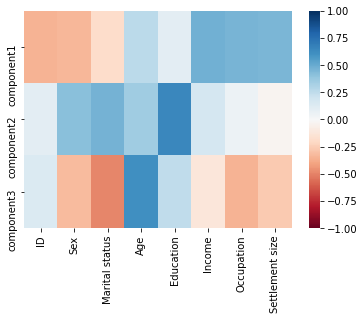

In [74]:
#Let visualize above data
sns.heatmap(pca_data,vmin=-1,vmax=1,cmap='RdBu')

In [75]:
pca.transform(segmentation_std) #TRANSFORMED DATA

array([[ 2.85978214,  0.93667597,  2.03658632],
       [ 0.94413038,  0.39449213, -2.43378502],
       [-0.02303213, -0.8817974 ,  1.97408269],
       ...,
       [-1.84179778, -2.15868138,  1.1160118 ],
       [-2.71683211,  0.56139001, -0.4762533 ],
       [-2.2097949 , -2.42344957,  0.86070907]])

In [76]:
pca_scores=pca.transform(segmentation_std)

In [88]:
pca_scores.shape

(2000, 3)

### Kmeans clustering with PCA

In [80]:
#Let try to find best nr of clusters possible
wcss=[]
for i in range(1,11):
    kms=KMeans(i)
    kms.fit(pca_scores)
    error=kms.inertia_
    wcss.append(error)

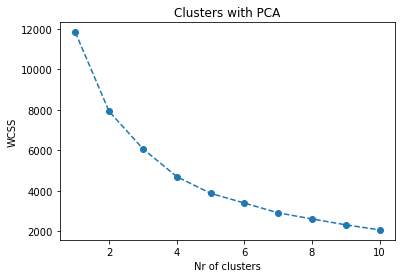

In [84]:
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Nr of clusters')
plt.ylabel('WCSS')
plt.title('Clusters with PCA')
plt.show()

In [99]:
#From result above we are chosing 4 clusters from elbow method
kmeans_pca=KMeans(4)
kmeans_pca.fit(pca_scores)
predicted_kmeans_pca=kmeans_pca.predict(pca_scores)
wcss=kmeans_pca.inertia_
wcss

4702.361942165089

In [98]:
#We will merge our initial dataset ,with pca components and final predictions of clusters using PCA
pca_scores_df=pd.DataFrame(data=pca_scores,columns=['Component1','Component2','Component3'])
pca_kmeans_result=pd.concat([data,pca_scores_df],axis=1)
pca_kmeans_result

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543
...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253


In [113]:
pca_kmeans_result['Clusters']=predicted_kmeans_pca
pca_kmeans_result.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,Clusters
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,0
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,3
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,1
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,3
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,3


In [114]:
pca_kmeans_result_freq=pca_kmeans_result.groupby('Clusters').mean()
pca_kmeans_result_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3
Clusters,,,,,,,,,,,
0,1.000009e+08,0.492481,0.684211,55.842105,2.127820,157389.387218,1.112782,1.097744,1.515293,2.158129,0.868010
1,1.000013e+08,0.341014,0.101382,35.025346,0.764977,92521.792627,0.209677,0.043779,-1.219512,-0.898654,1.016997
2,1.000012e+08,0.919040,0.967016,28.958021,1.064468,106617.467766,0.659670,0.427286,-1.205155,0.616021,-0.833262
3,1.000007e+08,0.034755,0.192733,35.462875,0.739336,140244.789889,1.254344,1.393365,1.469255,-0.939862,-0.184015


From graph of correlation earlier we stated from strong correlation of features with components that component1 identified more 'career focused'. component2:'Education and lifestyle',component3:'Experience'

Let see if we can map again same segments we identified earlier to this ones above.

3: there are the ones with average age of 35, high amount of income,high metric of occupation,3% are female(means of 1) and almost are single,low education,live in big cities so we identify them as "normal opportunities"

2: seem to be all in relationships with average age of 29,stable education,medium salary living in small cities.W identify them as "standard"

0: almost equally distributed between men and women,in relationships with average age of 55, high amount of salary and occupation living in big cities, so we identify them as 'well-off'

1:Most of them are male ,single,with average age of 34, low income,living in small areas, we identify this group as 'career-focused'

In [116]:
pca_kmeans_result_freq['Nr_obs']=pca_kmeans_result[['Sex','Clusters']].groupby('Clusters').count()
pca_kmeans_result_freq["Proportion"]=pca_kmeans_result_freq['Nr_obs']/pca_kmeans_result_freq['Nr_obs'].sum()

In [118]:
pca_kmeans_result_freq.rename({0:'well_off',
                               1:'career_focused',
                               2:'standard',
                               3:'normal_opportunities'
    
    
})

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,Nr_obs,Proportion
Clusters,,,,,,,,,,,,,
well_off,1.000009e+08,0.492481,0.684211,55.842105,2.127820,157389.387218,1.112782,1.097744,1.515293,2.158129,0.868010,266,0.1330
career_focused,1.000013e+08,0.341014,0.101382,35.025346,0.764977,92521.792627,0.209677,0.043779,-1.219512,-0.898654,1.016997,434,0.2170
standard,1.000012e+08,0.919040,0.967016,28.958021,1.064468,106617.467766,0.659670,0.427286,-1.205155,0.616021,-0.833262,667,0.3335
normal_opportunities,1.000007e+08,0.034755,0.192733,35.462875,0.739336,140244.789889,1.254344,1.393365,1.469255,-0.939862,-0.184015,633,0.3165


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


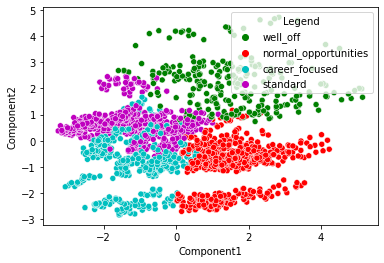

In [120]:
pca_kmeans_result['Legend']=pca_kmeans_result["Clusters"].map({0:'well_off',
                               1:'career_focused',
                               2:'standard',
                               3:'normal_opportunities'})

x=pca_kmeans_result['Component1']
y=pca_kmeans_result['Component2']
sns.scatterplot(x,y,hue=pca_kmeans_result['Legend'],palette=['g','r','c','m'])
plt.show()

We have reduced 8 features to 3 components and clustered the data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


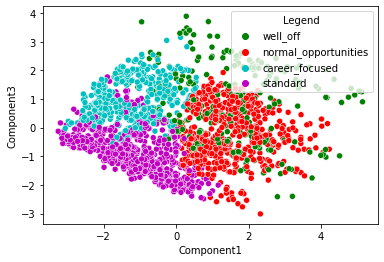

In [121]:
x=pca_kmeans_result['Component1']
y=pca_kmeans_result['Component3']
sns.scatterplot(x,y,hue=pca_kmeans_result['Legend'],palette=['g','r','c','m'])
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


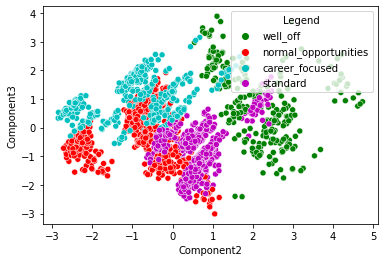

In [122]:
x=pca_kmeans_result['Component2']
y=pca_kmeans_result['Component3']
sns.scatterplot(x,y,hue=pca_kmeans_result['Legend'],palette=['g','r','c','m'])
plt.show()